In [1]:
from pylab import *
import numpy as np
from os import listdir
from sklearn.svm import LinearSVC
import cv2
from PIL import Image
from sklearn import svm
import imagehash
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import linear_model


def preprocess_image(path, display=False):
    raw_image = cv2.imread(path)
    bw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
    #bw_image = 255 - bw_image

    if display:
        cv2.imshow("RGB to Gray", bw_image)
        cv2.waitKey()

    #_, threshold_image = cv2.threshold(bw_image, 30, 255, 0)

    #if display:
     #   cv2.imshow("Threshold", threshold_image)
      #  cv2.waitKey()

    #return threshold_image
    return bw_image

def sift(im, path, display=False):
    raw_image = cv2.imread(path)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(im, None)

    if display:
        cv2.drawKeypoints(im, kp, raw_image)
        cv2.imshow('sift_keypoints.jpg', cv2.resize(raw_image, (0, 0), fx=3, fy=3))
        cv2.waitKey()

    return (path, des)


des_list = []


genuine_image_filenames = listdir("images/genuine")
forged_image_filenames = listdir("images/forged")

genuine_image_paths = "images/genuine"
forged_image_paths = "images/forged"

genuine_image_features = [[] for x in range(2)]
forged_image_features = [[] for x in range(2)]

for name in genuine_image_filenames:
    signature_id = int(name.split('_')[0][-3:])
    genuine_image_features[signature_id - 1].append({"name": name})

for name in forged_image_filenames:
    signature_id = int(name.split('_')[0][-3:])
    forged_image_features[signature_id - 1].append({"name": name})
    

cor = 0
wrong = 0
acc=[]
for itr in range(10):
    for i in range(2):
        des_list = []
        for im in genuine_image_features[i]:
            image_path = genuine_image_paths + "/" + im['name']
            preprocessed_image = preprocess_image(image_path)
            des_list.append(sift(preprocessed_image, image_path))

        for im in forged_image_features[i]:
            image_path = forged_image_paths + "/" + im['name']
            preprocessed_image = preprocess_image(image_path)
            des_list.append(sift(preprocessed_image, image_path))

        descriptors = des_list[0][1]
        for image_path, descriptor in des_list[1:]:
            descriptors = np.vstack((descriptors, descriptor))
        k = 300
        voc, variance = kmeans(descriptors, k, 1)
        im_features = np.zeros((len(genuine_image_features[i]) + len(forged_image_features[i]), k), "float32")

        for i in range(len(genuine_image_features[i]) + len(forged_image_features[i])):
            words, distance = vq(des_list[i][1], voc)
            for w in words:
                im_features[i][w] += 1

        stdSlr = StandardScaler().fit(im_features)
        im_features = stdSlr.transform(im_features)
        train_genuine_features, test_genuine_features = im_features[0:3], im_features[3:5]

        train_forged_features, test_forged_features = im_features[5:8], im_features[8:10]
        clf = LinearSVC()
        clf.fit(np.concatenate((train_forged_features,train_genuine_features)), np.array([1 for x in range(len(train_forged_features))] + [2 for x in range(len(train_genuine_features))]))

        genuine_res = clf.predict(test_genuine_features)

        for res in genuine_res:
            if int(res) == 2:
                cor += 1
            else:
                wrong += 1

        #print("1" + str(clf.predict(test_forged_features)))
        forged_res = clf.predict(test_forged_features)

        for res in forged_res:
            if int(res) == 1:
                cor += 1
            else:
                wrong += 1
    
    fin_res=float(cor)/(cor+wrong)
    print(float(cor)/(cor+wrong))
    acc.append(fin_res)

0.875
0.875
0.875
0.84375
0.825
0.8333333333333334
0.8035714285714286
0.8125
0.8194444444444444
0.825


In [2]:
np.mean(acc)

0.8387599206349206

In [3]:
genuine_image_features[0]

[{'name': '001001_000.png'},
 {'name': '001001_001.png'},
 {'name': '001001_002.png'},
 {'name': '001001_003.png'},
 {'name': '001001_004.png'}]

# CNN

In [4]:
genuine_image_filenames = listdir("trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Genuine")
forged_image_filenames = listdir("trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Forgeries")

genuine_image_paths = "trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Genuine"
forged_image_paths = "trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Forgeries"

train_X=[]
train_Y=[]
for im in genuine_image_filenames:
    image_path = genuine_image_paths + "/" + im
    img=cv2.imread(image_path)
    train_X.append(img)
    train_Y.append(1)

for im in forged_image_filenames:
    image_path = forged_image_paths + "/" + im
    img=cv2.imread(image_path)
    train_X.append(img)
    train_Y.append(0)

        

In [5]:
np.shape(train_X)

(362,)

In [6]:
train_Y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


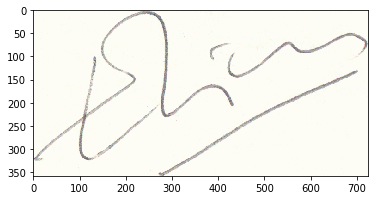

In [7]:
plt.imshow(train_X[0])

In [8]:
np.shape(train_X[3])

(373, 793, 3)

In [9]:
from PIL import Image

In [10]:
train_X_new=[]
for i in train_X:
    train_X_new.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

In [11]:
train_X_final=[]
for i in train_X_new:
    img=cv2.resize(i, (120,120), interpolation = cv2.INTER_AREA)
    train_X_final.append(img)

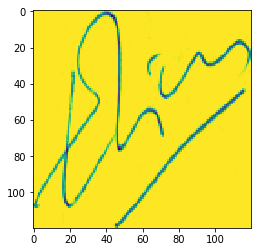

In [12]:
plt.imshow(train_X_final[0])

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
train_X_final[0].shape

(120, 120)

In [15]:
train_X_final=np.array(train_X_final)

train_X = train_X_final.reshape(-1, 120,120, 1)
#test_X = test_X_final.reshape(-1, 120,120, 1)
#train_X.shape, test_X.shape

In [16]:
train_X.shape

(362, 120, 120, 1)

In [17]:
train_X.shape

(362, 120, 120, 1)

In [18]:
train_X = train_X.astype('float32')
#test_X = test_X_final.astype('float32')
train_X = train_X / 255.
#test_X = test_X / 255.

In [19]:
type(train_X)

numpy.ndarray

In [20]:
train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

In [21]:
train_Y_one_hot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [22]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [23]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((289, 120, 120, 1), (73, 120, 120, 1), (289, 2), (73, 2))

In [24]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [25]:
batch_size = 73
epochs = 20
num_classes = 2

In [26]:
signature_model = Sequential()
signature_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(120,120,1),padding='same'))
signature_model.add(LeakyReLU(alpha=0.001))
signature_model.add(MaxPooling2D((2, 2),padding='same'))
signature_model.add(Dropout(0.25))

signature_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
signature_model.add(LeakyReLU(alpha=0.001))
signature_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
signature_model.add(Dropout(0.25))

signature_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
signature_model.add(LeakyReLU(alpha=0.001))
signature_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
signature_model.add(Dropout(0.4))


signature_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
signature_model.add(LeakyReLU(alpha=0.001))                  
signature_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
signature_model.add(Dropout(0.3))

signature_model.add(Flatten())
signature_model.add(Dense(128, activation='linear'))
signature_model.add(LeakyReLU(alpha=0.001))      
signature_model.add(Dropout(0.25))

signature_model.add(Dense(num_classes, activation='softmax'))

In [27]:
signature_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [28]:
signature_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 120, 32)      320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [29]:
signature_train = signature_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 289 samples, validate on 73 samples
Epoch 1/20
289/289 [==============================] - 20s 69ms/step - loss: 1.0445 - acc: 0.5675 - val_loss: 0.7038 - val_acc: 0.3014
Epoch 2/20
289/289 [==============================] - 19s 65ms/step - loss: 0.7249 - acc: 0.4048 - val_loss: 0.6860 - val_acc: 0.6986
Epoch 3/20
289/289 [==============================] - 21s 73ms/step - loss: 0.6638 - acc: 0.6505 - val_loss: 0.6554 - val_acc: 0.6986
Epoch 4/20
289/289 [==============================] - 18s 62ms/step - loss: 0.6567 - acc: 0.6505 - val_loss: 0.6556 - val_acc: 0.6986
Epoch 5/20
289/289 [==============================] - 23s 81ms/step - loss: 0.6504 - acc: 0.6505 - val_loss: 0.6633 - val_acc: 0.6986
Epoch 6/20
289/289 [==============================] - 21s 74ms/step - loss: 0.6534 - acc: 0.6505 - val_loss: 0.6623 - val_acc: 0.6986
Epoch 7/20
289/289 [==============================] - 24s 84ms/step - loss: 0.6527 - acc: 0.6505 - val_loss: 0.6685 - val_acc: 0.6986
Epoch 8/20
289/28